<a href="https://colab.research.google.com/github/shameesharmi154/AI-Keylogger-Detection./blob/main/Creditcard_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [26]:
data=pd.read_csv('/creditcard.csv')


In [14]:
data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [27]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,1
V9,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11683 non-null  int64  
 1   V1      11683 non-null  float64
 2   V2      11683 non-null  float64
 3   V3      11683 non-null  float64
 4   V4      11683 non-null  float64
 5   V5      11683 non-null  float64
 6   V6      11683 non-null  float64
 7   V7      11683 non-null  float64
 8   V8      11682 non-null  float64
 9   V9      11682 non-null  float64
 10  V10     11682 non-null  float64
 11  V11     11682 non-null  float64
 12  V12     11682 non-null  float64
 13  V13     11682 non-null  float64
 14  V14     11682 non-null  float64
 15  V15     11682 non-null  float64
 16  V16     11682 non-null  float64
 17  V17     11682 non-null  float64
 18  V18     11682 non-null  float64
 19  V19     11682 non-null  float64
 20  V20     11682 non-null  float64
 21  V21     11682 non-null  float64
 22

In [29]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,11683.0,7719.909783,5979.605669,0.000000,2468.500000,6329.000000,11927.000000,19929.000000
V1,11683.0,-0.218930,1.562304,-27.670569,-0.986679,-0.346841,1.159482,1.960497
V2,11683.0,0.274366,1.305756,-34.607649,-0.258310,0.261619,0.887528,9.067613
V3,11683.0,0.897415,1.273424,-21.405836,0.416652,0.949690,1.616155,4.101716
V4,11683.0,0.279525,1.467618,-4.657545,-0.616876,0.213597,1.152661,11.927512


In [30]:
data.shape

(11683, 31)

In [31]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [33]:
fraud_cases=len(data[data['class']==1])

In [34]:
print('Number of Fraud Cases:',fraud_cases)

Number of Fraud Cases: 49


In [35]:
non_fraud_cases=len(data[data['class']==0])

In [36]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 11633


In [37]:
fraud=data[data['class']==1]

In [38]:
genuine=data[data['class']==0]

In [39]:
fraud.Amount.describe()

,Amount
count,49.000000
mean,103.646735
std,330.135333
min,0.000000
25%,1.000000
50%,1.000000
75%,3.790000
max,1809.680000


In [40]:
genuine.Amount.describe()

,Amount
count,11633.000000
mean,62.572337
std,178.797878
min,0.000000
25%,5.180000
50%,15.950000
75%,50.000000
max,7712.430000


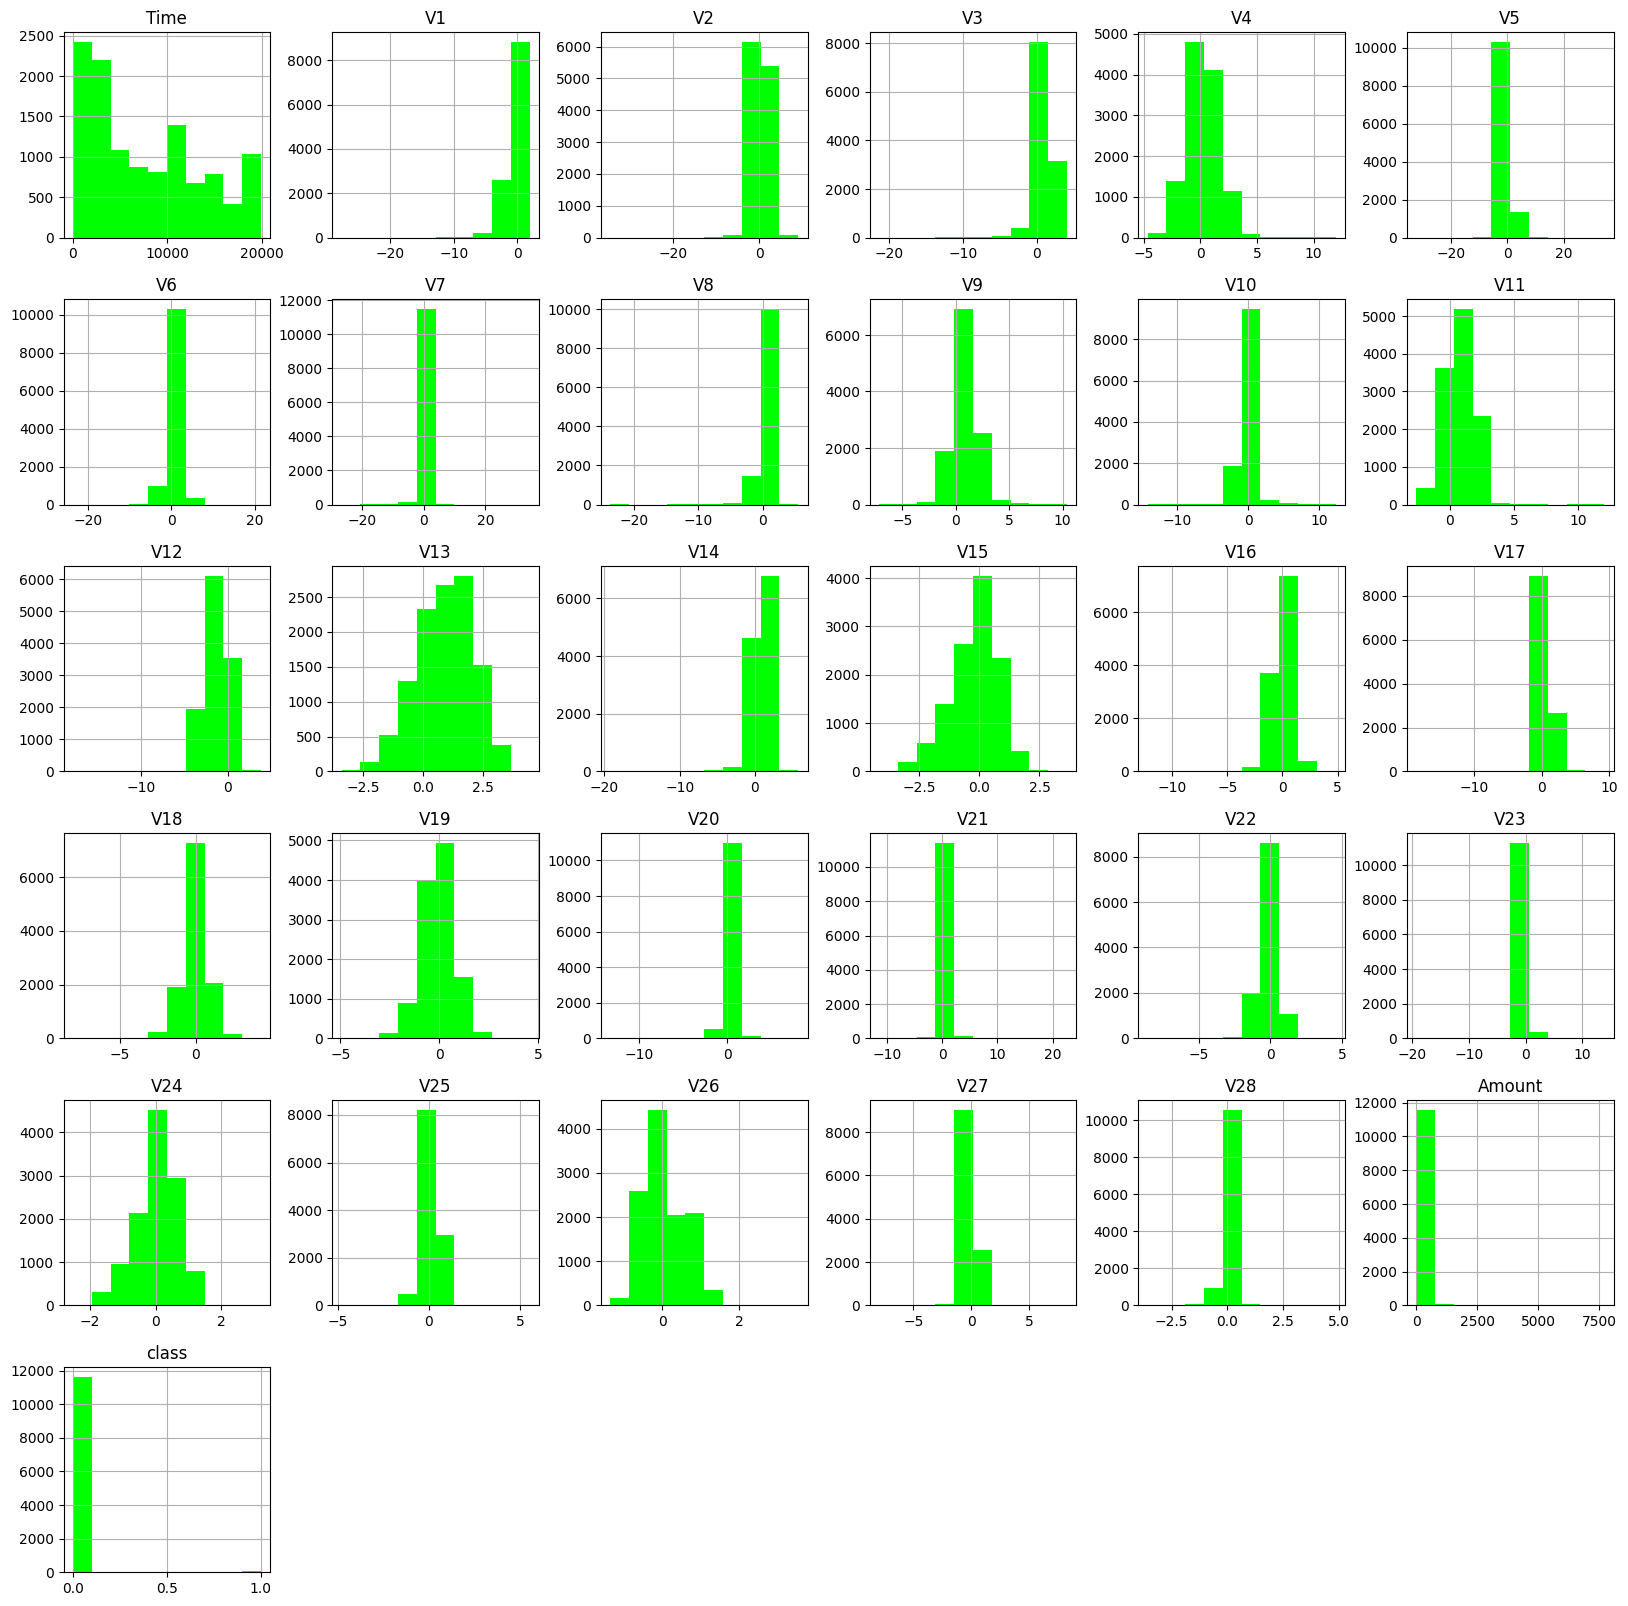

In [41]:
data.hist(figsize=(20,20),color='lime')
plt.show()

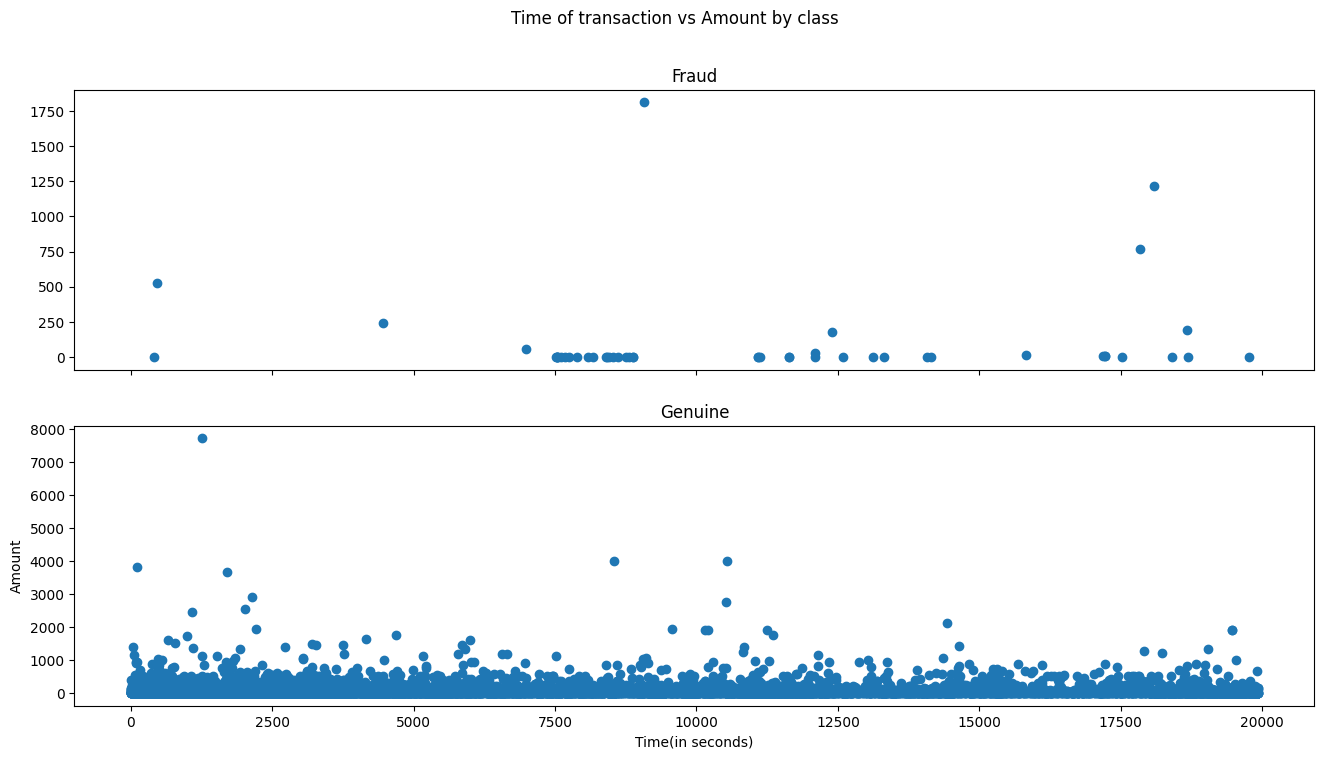

In [44]:
plt.rcParams['figure.figsize'] = 16,8
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time,genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

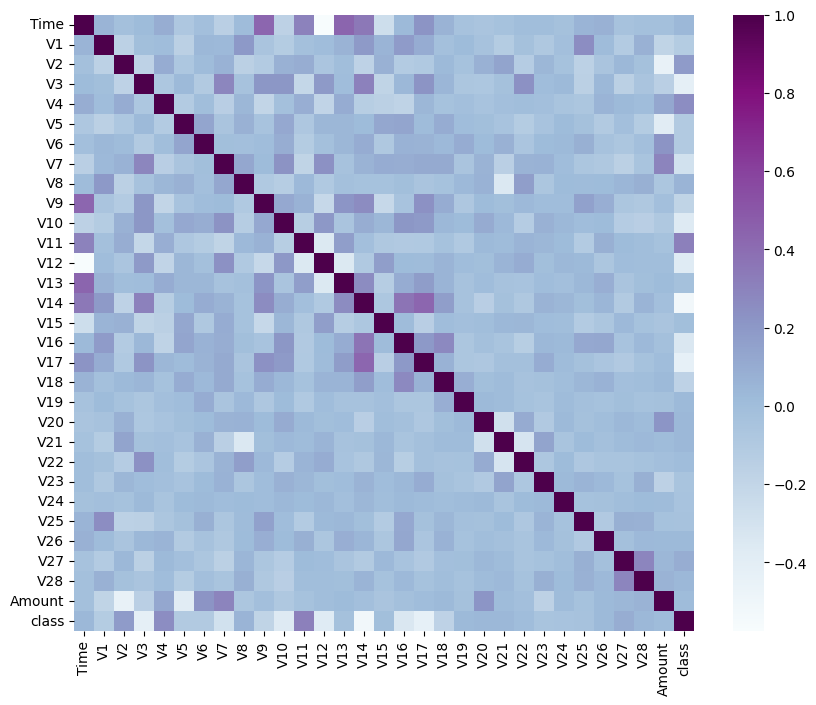

In [45]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
X1=data.drop(['class'],axis=1)

In [49]:
y1=data['class']

In [50]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=101)

In [51]:
lr=LogisticRegression()

In [55]:
X1_train_cleaned = X1_train.dropna()
y1_train_cleaned = y1_train.loc[X1_train_cleaned.index]
model2 = lr.fit(X1_train_cleaned, y1_train_cleaned)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
prediction2=model2.predict(X1_test)

In [59]:
accuracy_score(y1_test,prediction2)

0.9980028530670471

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
X2=data.drop(['class'],axis=1)

In [62]:
y2=data['class']

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [66]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=101)

In [68]:
X2_train_cleaned = X2_train.dropna()
y2_train_cleaned = y2_train.loc[X2_train_cleaned.index]
model3=dt.fit(X2_train_cleaned,y2_train_cleaned)

In [69]:
prediction3=model3.predict(X2_test)

In [70]:
accuracy_score(y2_test,prediction3)

0.9980028530670471